In [2]:
!ls
%cd drive
!ls
%cd MyDrive
%cd Trash_Data
!ls

drive  sample_data
/content/drive
MyDrive  Shareddrives
/content/drive/MyDrive
/content/drive/MyDrive/Trash_Data
garbage-classification-v2.zip  kaggle.json  requirements.txt  TACO


In [3]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 74.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38

In [4]:
!pip uninstall -y sympy
!pip install sympy

Found existing installation: sympy 1.13.1
Uninstalling sympy-1.13.1:
  Successfully uninstalled sympy-1.13.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 36.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires sympy==1.13.1; python_version >= "3.9", but you have sympy 1.13.3 which is incompatible.


In [5]:
# Begin Setup
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import random
import os
from skimage import io

# set random seeds
torch.manual_seed(131)
np.random.seed(131)
random.seed(131)

Import Data

In [ ]:
# Clone the TACO dataset repository
!git clone https://github.com/pedropro/TACO.git
# Navigate to the TACO directory
%cd TACO
# Verify if the download script exists
!ls

Cloning into 'TACO'...
remote: Enumerating objects: 740, done.
remote: Counting objects: 100% (435/435), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 740 (delta 416), reused 380 (delta 380), pack-reused 305 (from 1)
Receiving objects: 100% (740/740), 97.48 MiB | 12.40 MiB/s, done.
Resolving deltas: 100% (499/499), done.
Updating files: 100% (25/25), done.
/content/drive/MyDrive/Trash_Data/TACO
data  demo.ipynb  detector  download.py  LICENSE  README.md  requirements.txt


In [ ]:
!python download.py

Note. If for any reason the connection is broken. Just call me again and I will start where I left.
Finished


In [ ]:
!pip install kaggle

In [ ]:
os.getcwd()
os.chdir('..')
os.getcwd()

'/content/drive/MyDrive/Trash_Data'

In [ ]:
!chmod 600 kaggle.json

In [ ]:
!kaggle datasets list
!kaggle datasets download sumn2u/garbage-classification-v2
!mkdir ./train
!unzip garbage-classification-v2.zip -d train

Streaming output truncated to the last 5000 lines.
  inflating: train/garbage-dataset/paper/paper_847.jpg  
  inflating: train/garbage-dataset/paper/paper_848.jpg  
  inflating: train/garbage-dataset/paper/paper_849.jpg  
  inflating: train/garbage-dataset/paper/paper_851.jpg  
  inflating: train/garbage-dataset/paper/paper_852.jpg  
  inflating: train/garbage-dataset/paper/paper_853.jpg  
  inflating: train/garbage-dataset/paper/paper_855.jpg  
  inflating: train/garbage-dataset/paper/paper_856.jpg  
  inflating: train/garbage-dataset/paper/paper_857.jpg  
  inflating: train/garbage-dataset/paper/paper_859.jpg  
  inflating: train/garbage-dataset/paper/paper_861.jpg  
  inflating: train/garbage-dataset/paper/paper_863.jpg  
  inflating: train/garbage-dataset/paper/paper_865.jpg  
  inflating: train/garbage-dataset/paper/paper_868.jpg  
  inflating: train/garbage-dataset/paper/paper_870.jpg  
  inflating: train/garbage-dataset/paper/paper_871.jpg  
  inflating: train/garbage-dataset/pa

# Organize TACO Data

In [11]:
!pwd
%cd MyDrive
%cd Trash_Data
%cd TACO
%cd data
import json
import cv2

/content/drive/MyDrive
[Errno 2] No such file or directory: 'MyDrive'
/content/drive/MyDrive
/content/drive/MyDrive/Trash_Data
/content/drive/MyDrive/Trash_Data/TACO
/content/drive/MyDrive/Trash_Data/TACO/data


In [13]:
anns_file_path = './data' + '/' + 'annotations.json'
with open('annotations.json', 'r') as f:
    dataset = json.loads(f.read())

categories = dataset['categories']
anns = dataset['annotations']
imgs = dataset['images']
nr_cats = len(categories)
nr_annotations = len(anns)
nr_images = len(imgs)

cat_names = []
super_cat_names = []
super_cat_ids = {}
nr_super_cats = 0

super_cat_last_name = ""

for cat_it in categories:
    cat_names.append(cat_it['name'])
    super_cat_name = cat_it['supercategory']
    # Adding new supercat
    if super_cat_name != super_cat_last_name:
        super_cat_names.append(super_cat_name)
        super_cat_ids[super_cat_name] = nr_super_cats
        super_cat_last_name = super_cat_name
        nr_super_cats += 1


heights = [img['height'] for img in imgs]
index = heights.index(474)
print(index)
[x, y, w, h] = anns[0]['bbox']
heights = np.array(heights)
unique_heights = np.unique(heights)
print(unique_heights)
print(imgs)
print(anns)

549
[ 474  751  960 1280 1408 1536 1537 1600 1824 1968 2016 2048 2049 2160
 2195 2290 2337 2340 2368 2448 2470 2597 2607 2756 2760 2858 2976 2988
 3000 3011 3024 3085 3120 3235 3264 3456 3463 3968 4000 4032 4128 4160
 4208 4608 4618 5312]
[{'id': 0, 'width': 1537, 'height': 2049, 'file_name': 'batch_1/000006.jpg', 'license': None, 'flickr_url': 'https://farm66.staticflickr.com/65535/33978196618_e30a59e0a8_o.png', 'coco_url': None, 'date_captured': None, 'flickr_640_url': 'https://farm66.staticflickr.com/65535/33978196618_632623b4fc_z.jpg'}, {'id': 1, 'width': 1537, 'height': 2049, 'file_name': 'batch_1/000008.jpg', 'license': None, 'flickr_url': 'https://farm66.staticflickr.com/65535/47803331152_ee00755a2e_o.png', 'coco_url': None, 'date_captured': None, 'flickr_640_url': 'https://farm66.staticflickr.com/65535/47803331152_19beae025a_z.jpg'}, {'id': 2, 'width': 1537, 'height': 2049, 'file_name': 'batch_1/000010.jpg', 'license': None, 'flickr_url': 'https://farm66.staticflickr.com/65535/

batch_1/000006.jpg
H: 2049 W: 1537
(517, 127)
(964, 1449)


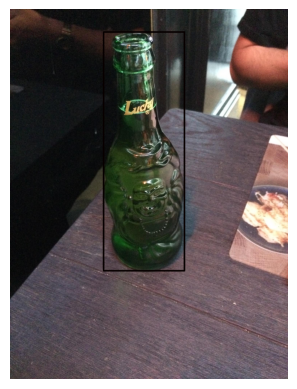

H: 640 W: 640


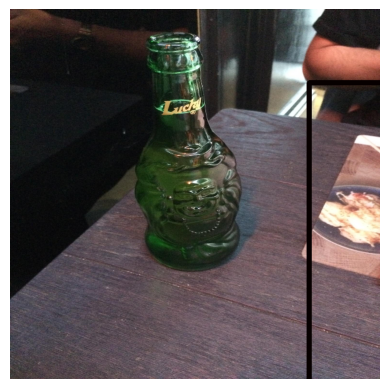

In [27]:
# Checking images
import matplotlib.pyplot as plt
print(imgs[0]['file_name'])
img1 = io.imread(imgs[0]['file_name'])

H, W, C = img1.shape
print(f"H: {H} W: {W}")

plt.figure(1)
plt.imshow(img1)
plt.axis('off')

start_point = (int(x), int(y))
end_point = (int(x + w) , int(y + h))

print(start_point)
print(end_point)

og_img = img1.copy()  # Make a copy before modifying
cv2.rectangle(og_img, start_point, end_point, 7, 8)

plt.imshow(og_img)
plt.axis('off')
plt.show()


resized = cv2.resize(img1, (640, 640))
H, W, C = resized.shape

# Resize bounding boxes
scale_x = 640 / W
scale_y = 640 / H

start_point_rs = (int(x * scale_x), int(y * scale_y))
end_point_rs = (int((x + w) * scale_x), int((y + h)* scale_y))
print(f"H: {H} W: {W}")

cv2.rectangle(resized, start_point_rs, end_point_rs, 7, 8)

plt.figure(2)
plt.imshow(resized)
plt.axis('off')

plt.show()






